In [54]:
# Dependencies
# Note had to run pip install poloygon-api-client
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint
from datetime import date, datetime, timedelta
import time
import datetime
from dateutil.parser import parse


from config import api_key 
 
#api_key


In [55]:

#Get summary information on each company

count = 1
while count < 4:
          
    if count == 1:
        name = "AAPL"
               
    elif count == 2:
        name = "GOOG"
                
    elif count == 3:
        name = "AMZN"
        
        
    
    
    url= f"https://api.polygon.io/v3/reference/tickers/{name}?apiKey={api_key}"
    #print(url)
    #print(requests.get(url).json())
    
    response = requests.get(url).json() 
            
    print(json.dumps(response,indent=4))
     

    
    #print(response["results"]["description"])
    #print('------------------------------------')
    
    count+=1
    

 
 

{
    "results": {
        "ticker": "AAPL",
        "name": "Apple Inc.",
        "market": "stocks",
        "locale": "us",
        "primary_exchange": "XNAS",
        "type": "CS",
        "active": true,
        "currency_name": "usd",
        "cik": "0000320193",
        "composite_figi": "BBG000B9XRY4",
        "share_class_figi": "BBG001S5N8V8",
        "market_cap": 2502858916480,
        "phone_number": "(408) 996-1010",
        "address": {
            "address1": "ONE APPLE PARK WAY",
            "city": "CUPERTINO",
            "state": "CA",
            "postal_code": "95014"
        },
        "description": "Apple designs a wide variety of consumer electronic devices, including smartphones (iPhone), tablets (iPad), PCs (Mac), smartwatches (Apple Watch), AirPods, and TV boxes (Apple TV), among others. The iPhone makes up the majority of Apple's total revenue. In addition, Apple offers its customers a variety of services such as Apple Music, iCloud, Apple Care, Apple TV+,

In [73]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummyd = pd.DataFrame(columns = ["ticker","c", "t"])
for name in tickers:
    url = f"https://api.polygon.io/v2/aggs/ticker/{name}/range/1/day/2012-01-01/2022-10-22?adjusted=true&sort=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"])
    datadata["ticker"] = name
    datadata = datadata[["ticker", "c", "t"]]
    dummyd = pd.concat([dummyd, datadata])
dummyd.columns = ["ticker", "close", "date"]
#print(dummyd) 

In [74]:
dummyd["date"] = pd.to_datetime(dummyd["date"], unit = "ms")
dummyd["dates"] = dummyd["date"].dt.date  
dummyd.drop("date", axis=1,inplace=True)
print(dummyd)
  
 

     ticker     close       dates
0      AAPL   21.3050  2012-11-01
1      AAPL   20.6000  2012-11-02
2      AAPL   20.8793  2012-11-05
3      AAPL   20.8161  2012-11-06
4      AAPL   19.9286  2012-11-07
...     ...       ...         ...
2506   AMZN  113.7900  2022-10-17
2507   AMZN  116.3600  2022-10-18
2508   AMZN  115.0700  2022-10-19
2509   AMZN  115.2500  2022-10-20
2510   AMZN  119.3200  2022-10-21

[7533 rows x 3 columns]


In [75]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummym = pd.DataFrame(columns = ["ticker", "c", "t"])
for name in tickers:
    url = f"https://api.polygon.io/v2/aggs/ticker/{name}/range/1/month/2012-01-01/2022-10-22?adjusted=true&sort=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"])
    datadata["ticker"] = name
    datadata = datadata[["ticker","c", "t"]]
    dummym = pd.concat([dummym, datadata])
dummym.columns = ["ticker", "close", "date"]
print(dummym)

    ticker     close           date
0     AAPL   20.9029  1351742400000
1     AAPL   19.0062  1354338000000
2     AAPL   16.2675  1357016400000
3     AAPL   15.7643  1359694800000
4     AAPL   15.8093  1362114000000
..     ...       ...            ...
115   AMZN  106.2100  1654056000000
116   AMZN  134.9500  1656648000000
117   AMZN  126.7700  1659326400000
118   AMZN  113.0000  1662004800000
119   AMZN  103.4100  1664596800000

[360 rows x 3 columns]


In [76]:
dummym["date"] = pd.to_datetime(dummym["date"], unit = "ms")
dummym["dates"] = dummym["date"].dt.date  
dummym.drop("date", axis=1,inplace=True)
print(dummym)

    ticker     close       dates
0     AAPL   20.9029  2012-11-01
1     AAPL   19.0062  2012-12-01
2     AAPL   16.2675  2013-01-01
3     AAPL   15.7643  2013-02-01
4     AAPL   15.8093  2013-03-01
..     ...       ...         ...
115   AMZN  106.2100  2022-06-01
116   AMZN  134.9500  2022-07-01
117   AMZN  126.7700  2022-08-01
118   AMZN  113.0000  2022-09-01
119   AMZN  103.4100  2022-10-01

[360 rows x 3 columns]


In [77]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysd20 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=day&adjusted=true&window=20&series_type=close&order=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 20
    #datadata = datadata[[ "timestamp", "value"]]
    dummysd20 = pd.concat([dummysd20, datadata])

print(dummysd20)

  ticker      timestamp      value  window
0   AAPL  1354165200000  20.117820    20.0
1   AAPL  1354251600000  20.097715    20.0
2   AAPL  1354510800000  20.114485    20.0
3   AAPL  1354597200000  20.098815    20.0
4   AAPL  1354683600000  20.020140    20.0
5   AAPL  1354770000000  20.000930    20.0
6   AAPL  1354856400000  19.992890    20.0
7   AAPL  1355115600000  19.962105    20.0
8   AAPL  1355202000000  19.959530    20.0
9   AAPL  1355288400000  19.952570    20.0
0   GOOG  1354165200000  16.700820    20.0
1   GOOG  1354251600000  16.714280    20.0
2   GOOG  1354510800000  16.723435    20.0
3   GOOG  1354597200000  16.733515    20.0
4   GOOG  1354683600000  16.741130    20.0
5   GOOG  1354770000000  16.771115    20.0
6   GOOG  1354856400000  16.810975    20.0
7   GOOG  1355115600000  16.838935    20.0
8   GOOG  1355202000000  16.877620    20.0
9   GOOG  1355288400000  16.925705    20.0
0   AMZN  1354165200000  11.677060    20.0
1   AMZN  1354251600000  11.726835    20.0
2   AMZN  1

In [78]:
dummysd20["timestamp"] = pd.to_datetime(dummysd20["timestamp"], unit = "ms")
dummysd20["dates"] = dummysd20["timestamp"].dt.date  
dummysd20.drop("timestamp", axis=1,inplace=True)
print(dummysd20)

  ticker      value  window       dates
0   AAPL  20.117820    20.0  2012-11-29
1   AAPL  20.097715    20.0  2012-11-30
2   AAPL  20.114485    20.0  2012-12-03
3   AAPL  20.098815    20.0  2012-12-04
4   AAPL  20.020140    20.0  2012-12-05
5   AAPL  20.000930    20.0  2012-12-06
6   AAPL  19.992890    20.0  2012-12-07
7   AAPL  19.962105    20.0  2012-12-10
8   AAPL  19.959530    20.0  2012-12-11
9   AAPL  19.952570    20.0  2012-12-12
0   GOOG  16.700820    20.0  2012-11-29
1   GOOG  16.714280    20.0  2012-11-30
2   GOOG  16.723435    20.0  2012-12-03
3   GOOG  16.733515    20.0  2012-12-04
4   GOOG  16.741130    20.0  2012-12-05
5   GOOG  16.771115    20.0  2012-12-06
6   GOOG  16.810975    20.0  2012-12-07
7   GOOG  16.838935    20.0  2012-12-10
8   GOOG  16.877620    20.0  2012-12-11
9   GOOG  16.925705    20.0  2012-12-12
0   AMZN  11.677060    20.0  2012-11-29
1   AMZN  11.726835    20.0  2012-11-30
2   AMZN  11.771605    20.0  2012-12-03
3   AMZN  11.817000    20.0  2012-12-04


In [79]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysd50 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=day&adjusted=true&window=50&series_type=close&order=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 50
    #datadata = datadata[[ "timestamp", "value"]]
    dummysd50 = pd.concat([dummysd50, datadata])

print(dummysd50)

  ticker      timestamp      value  window
0   AAPL  1358139600000  19.444542    50.0
1   AAPL  1358226000000  19.365528    50.0
2   AAPL  1358312400000  19.315020    50.0
3   AAPL  1358398800000  19.256492    50.0
4   AAPL  1358485200000  19.197312    50.0
5   AAPL  1358830800000  19.159290    50.0
6   AAPL  1358917200000  19.142328    50.0
7   AAPL  1359003600000  19.073356    50.0
8   AAPL  1359090000000  18.999820    50.0
9   AAPL  1359349200000  18.933344    50.0
0   GOOG  1358139600000  17.349720    50.0
1   GOOG  1358226000000  17.368370    50.0
2   GOOG  1358312400000  17.381992    50.0
3   GOOG  1358398800000  17.396158    50.0
4   GOOG  1358485200000  17.407542    50.0
5   GOOG  1358830800000  17.425400    50.0
6   GOOG  1358917200000  17.469960    50.0
7   GOOG  1359003600000  17.515314    50.0
8   GOOG  1359090000000  17.559154    50.0
9   GOOG  1359349200000  17.604946    50.0
0   AMZN  1358139600000  12.361372    50.0
1   AMZN  1358226000000  12.401132    50.0
2   AMZN  1

In [80]:
dummysd50["timestamp"] = pd.to_datetime(dummysd50["timestamp"], unit = "ms")
dummysd50["dates"] = dummysd50["timestamp"].dt.date  
dummysd50.drop("timestamp", axis=1,inplace=True)
print(dummysd50)

  ticker      value  window       dates
0   AAPL  19.444542    50.0  2013-01-14
1   AAPL  19.365528    50.0  2013-01-15
2   AAPL  19.315020    50.0  2013-01-16
3   AAPL  19.256492    50.0  2013-01-17
4   AAPL  19.197312    50.0  2013-01-18
5   AAPL  19.159290    50.0  2013-01-22
6   AAPL  19.142328    50.0  2013-01-23
7   AAPL  19.073356    50.0  2013-01-24
8   AAPL  18.999820    50.0  2013-01-25
9   AAPL  18.933344    50.0  2013-01-28
0   GOOG  17.349720    50.0  2013-01-14
1   GOOG  17.368370    50.0  2013-01-15
2   GOOG  17.381992    50.0  2013-01-16
3   GOOG  17.396158    50.0  2013-01-17
4   GOOG  17.407542    50.0  2013-01-18
5   GOOG  17.425400    50.0  2013-01-22
6   GOOG  17.469960    50.0  2013-01-23
7   GOOG  17.515314    50.0  2013-01-24
8   GOOG  17.559154    50.0  2013-01-25
9   GOOG  17.604946    50.0  2013-01-28
0   AMZN  12.361372    50.0  2013-01-14
1   AMZN  12.401132    50.0  2013-01-15
2   AMZN  12.437640    50.0  2013-01-16
3   AMZN  12.473790    50.0  2013-01-17


In [81]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysm20 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=month&adjusted=true&window=20&series_type=close&order=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 50
    #datadata = datadata[[ "timestamp", "value"]]
    dummysm20 = pd.concat([dummysm20, datadata])


In [82]:
dummysm20["timestamp"] = pd.to_datetime(dummysm20["timestamp"], unit = "ms")
dummysm20["dates"] = dummysm20["timestamp"].dt.date  
dummysm20.drop("timestamp", axis=1,inplace=True)
print(dummysm20)

  ticker      value  window       dates
0   AAPL  18.284855    50.0  2014-06-01
1   AAPL  18.434710    50.0  2014-07-01
2   AAPL  18.765650    50.0  2014-08-01
3   AAPL  19.211650    50.0  2014-09-01
4   AAPL  19.773435    50.0  2014-10-01
5   AAPL  20.469595    50.0  2014-11-01
6   AAPL  21.058665    50.0  2014-12-01
7   AAPL  21.720065    50.0  2015-01-01
8   AAPL  22.617725    50.0  2015-02-01
9   AAPL  23.365010    50.0  2015-03-01
0   GOOG  25.111500    50.0  2014-06-01
1   GOOG  25.668410    50.0  2014-07-01
2   GOOG  26.214070    50.0  2014-08-01
3   GOOG  26.713800    50.0  2014-09-01
4   GOOG  27.111000    50.0  2014-10-01
5   GOOG  27.473830    50.0  2014-11-01
6   GOOG  27.760145    50.0  2014-12-01
7   GOOG  28.008510    50.0  2015-01-01
8   GOOG  28.305145    50.0  2015-02-01
9   GOOG  28.566565    50.0  2015-03-01
0   AMZN  15.374440    50.0  2014-06-01
1   AMZN  15.526790    50.0  2014-07-01
2   AMZN  15.747215    50.0  2014-08-01
3   AMZN  15.889565    50.0  2014-09-01


In [83]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysm50 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=month&adjusted=true&window=50&series_type=close&order=asc&limit=5000&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 50
    #datadata = datadata[[ "timestamp", "value"]]
    dummysm50 = pd.concat([dummysm50, datadata])

print(dummysm50)

   ticker      timestamp       value  window
0    AAPL  1480568400000   23.963668    50.0
1    AAPL  1483246800000   24.152360    50.0
2    AAPL  1485925200000   24.457186    50.0
3    AAPL  1488344400000   24.850136    50.0
4    AAPL  1491019200000   25.253100    50.0
..    ...            ...         ...     ...
66   AMZN  1654056000000  124.352220    50.0
67   AMZN  1656648000000  125.421600    50.0
68   AMZN  1659326400000  126.257200    50.0
69   AMZN  1662004800000  126.739760    50.0
70   AMZN  1664596800000  126.795250    50.0

[213 rows x 4 columns]


In [84]:
dummysm50["timestamp"] = pd.to_datetime(dummysm50["timestamp"], unit = "ms")
dummysm50["dates"] = dummysm50["timestamp"].dt.date  
dummysm50.drop("timestamp", axis=1,inplace=True)
print(dummysm50)

   ticker       value  window       dates
0    AAPL   23.963668    50.0  2016-12-01
1    AAPL   24.152360    50.0  2017-01-01
2    AAPL   24.457186    50.0  2017-02-01
3    AAPL   24.850136    50.0  2017-03-01
4    AAPL   25.253100    50.0  2017-04-01
..    ...         ...     ...         ...
66   AMZN  124.352220    50.0  2022-06-01
67   AMZN  125.421600    50.0  2022-07-01
68   AMZN  126.257200    50.0  2022-08-01
69   AMZN  126.739760    50.0  2022-09-01
70   AMZN  126.795250    50.0  2022-10-01

[213 rows x 4 columns]


In [85]:
# this worked but then issues merging in 50 
#dummyd20 = pd.merge(dummyd, dummysd20, on=["dates","ticker"])

dummychar = dummyd.merge(dummysd20, on=["dates", "ticker"], how = "left")
dummychart = dummychar.merge(dummysd50, on=["dates", "ticker"], how = "left")
dummychart
del dummychart["window_x"]
del dummychart["window_y"]
print(dummychart) 

     ticker     close       dates  value_x  value_y
0      AAPL   21.3050  2012-11-01      NaN      NaN
1      AAPL   20.6000  2012-11-02      NaN      NaN
2      AAPL   20.8793  2012-11-05      NaN      NaN
3      AAPL   20.8161  2012-11-06      NaN      NaN
4      AAPL   19.9286  2012-11-07      NaN      NaN
...     ...       ...         ...      ...      ...
7528   AMZN  113.7900  2022-10-17      NaN      NaN
7529   AMZN  116.3600  2022-10-18      NaN      NaN
7530   AMZN  115.0700  2022-10-19      NaN      NaN
7531   AMZN  115.2500  2022-10-20      NaN      NaN
7532   AMZN  119.3200  2022-10-21      NaN      NaN

[7533 rows x 5 columns]


In [86]:
# this worked but then issues merging in 50 
#dummyd20 = pd.merge(dummyd, dummysd20, on=["dates","ticker"])

dummycharm = dummym.merge(dummysm20, on=["dates", "ticker"], how = "left")
dummychartm = dummycharm.merge(dummysm50, on=["dates", "ticker"], how = "left")
dummychartm
del dummychartm["window_x"]
del dummychartm["window_y"]
print(dummychartm) 

    ticker     close       dates  value_x    value_y
0     AAPL   20.9029  2012-11-01      NaN        NaN
1     AAPL   19.0062  2012-12-01      NaN        NaN
2     AAPL   16.2675  2013-01-01      NaN        NaN
3     AAPL   15.7643  2013-02-01      NaN        NaN
4     AAPL   15.8093  2013-03-01      NaN        NaN
..     ...       ...         ...      ...        ...
355   AMZN  106.2100  2022-06-01      NaN  124.35222
356   AMZN  134.9500  2022-07-01      NaN  125.42160
357   AMZN  126.7700  2022-08-01      NaN  126.25720
358   AMZN  113.0000  2022-09-01      NaN  126.73976
359   AMZN  103.4100  2022-10-01      NaN  126.79525

[360 rows x 5 columns]


In [90]:
aapl_daily = dummychart[dummychart["ticker"] == "AAPL"]
aapl_daily = pd.DataFrame(aapl_daily)
amzn_daily = dummychart[dummychart["ticker"] == "AMZN"]
amzn_daily = pd.DataFrame(amzn_daily)
goog_daily = dummychart[dummychart["ticker"] == "GOOG"]
goog_daily = pd.DataFrame(goog_daily)

#rename columns
aapl_daily.rename(columns = {'close':'AAPL daily'}, inplace = True)
amzn_daily.rename(columns = {'close':'AMZN daily'}, inplace = True)
goog_daily.rename(columns = {'close':'GOOG daily'}, inplace = True)
amzn_daily.head()

,ticker,AMZN daily,dates,value_x,value_y
5022,AMZN,11.6070,2012-11-01,NaN,NaN
5023,AMZN,11.6211,2012-11-02,NaN,NaN
5024,AMZN,11.7165,2012-11-05,NaN,NaN
5025,AMZN,11.8780,2012-11-06,NaN,NaN
5026,AMZN,11.6030,2012-11-07,NaN,NaN


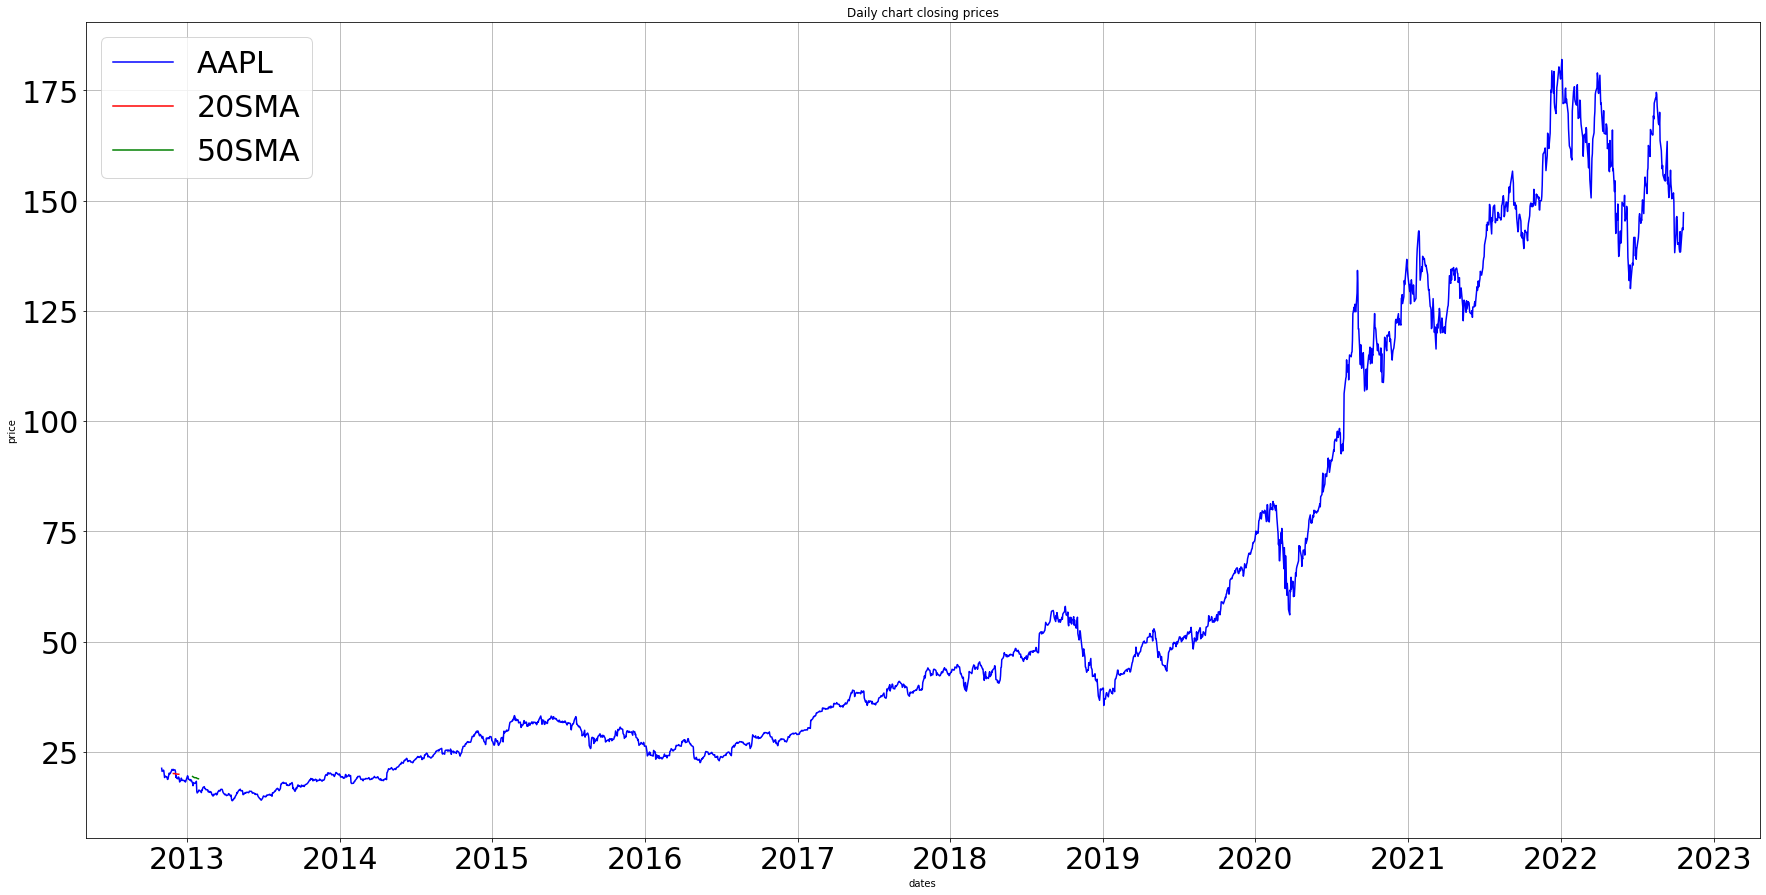

In [91]:
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

aapl_daily_close, = plt.plot(aapl_daily["dates"], aapl_daily["AAPL daily"], color='blue', label="AAPL")
aapl_daily_20SMA, = plt.plot(aapl_daily["dates"], aapl_daily["value_x"], color='red', label="20SMA")
aapl_daily_50SMA, = plt.plot(aapl_daily["dates"], aapl_daily["value_y"], color='green', label="50SMA")
plt.grid()
plt.xlabel("dates")
plt.ylabel("price")
plt.title("Daily chart closing prices")
plt.legend(fontsize = "30",loc="upper left")

In [92]:
aapl_monthly = dummychartm[dummychartm["ticker"] == "AAPL"]
aapl_monthly = pd.DataFrame(aapl_monthly)
amzn_monthly = dummychartm[dummychartm["ticker"] == "AMZN"]
amzn_monthly = pd.DataFrame(amzn_monthly)
goog_monthly = dummychartm[dummychartm["ticker"] == "GOOG"]
goog_monthly = pd.DataFrame(goog_monthly)

#rename columns
aapl_monthly.rename(columns = {'close':'AAPL monthly'}, inplace = True)
amzn_monthly.rename(columns = {'close':'AMZN monthly'}, inplace = True)
goog_monthly.rename(columns = {'close':'GOOG monthly'}, inplace = True)
amzn_monthly.head()

,ticker,AMZN monthly,dates,value_x,value_y
240,AMZN,12.6025,2012-11-01,NaN,NaN
241,AMZN,12.5435,2012-12-01,NaN,NaN
242,AMZN,13.2750,2013-01-01,NaN,NaN
243,AMZN,13.2135,2013-02-01,NaN,NaN
244,AMZN,13.3245,2013-03-01,NaN,NaN


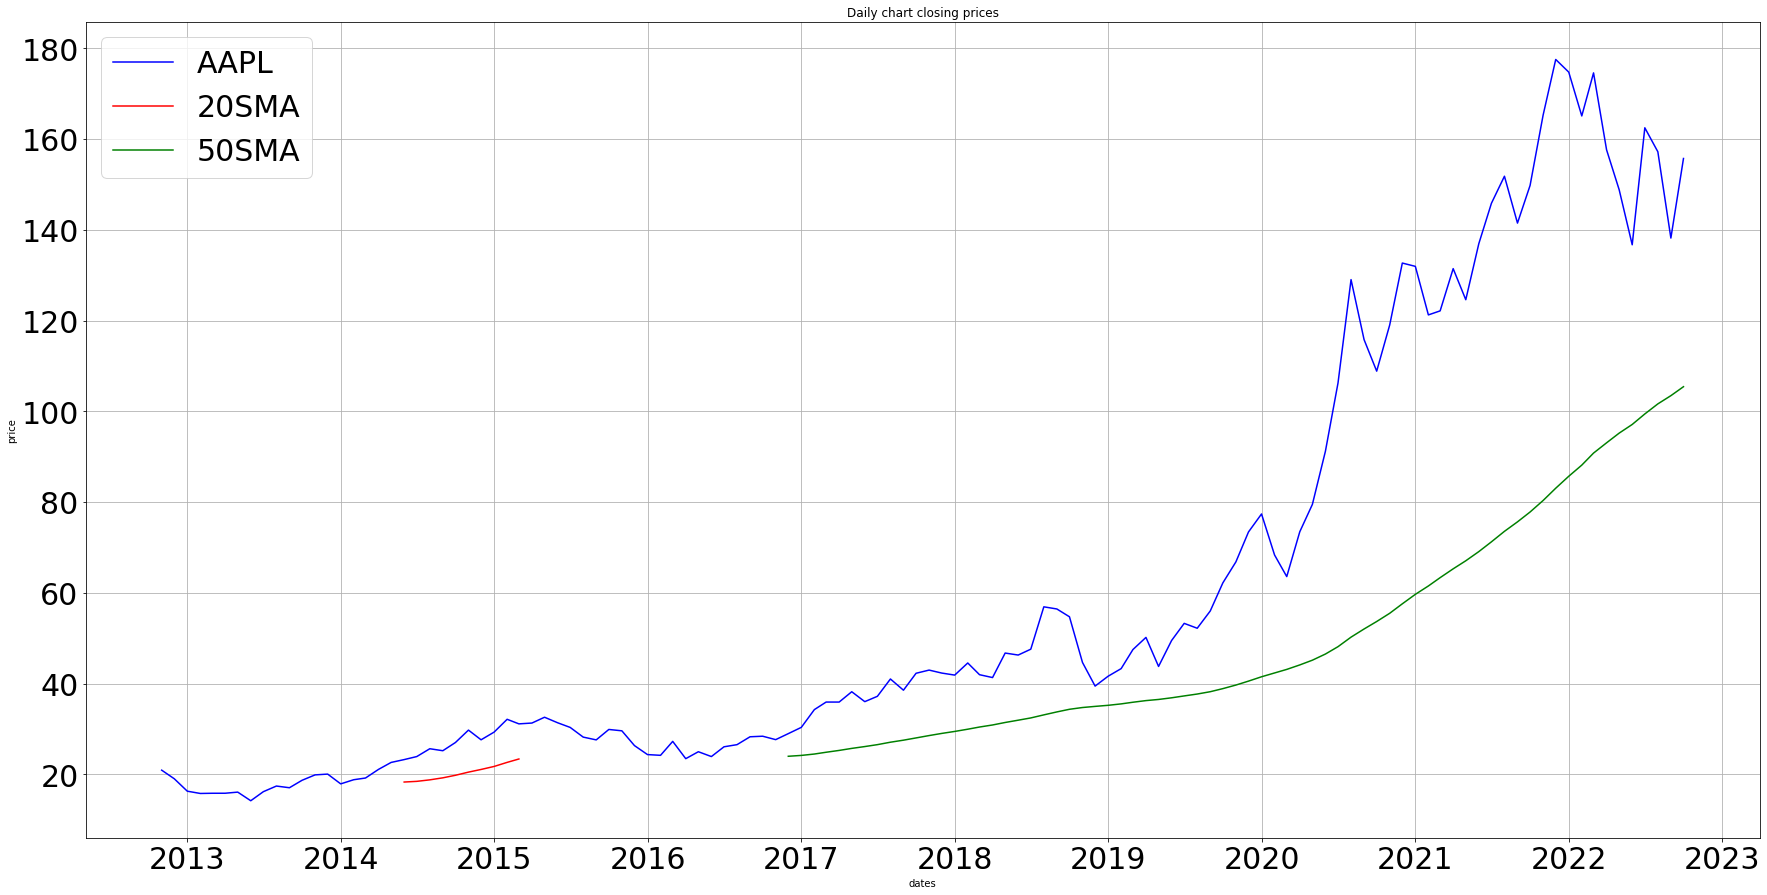

In [50]:
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

aapl_monthly_close, = plt.plot(aapl_monthly["dates"], aapl_monthly["AAPL monthly"], color='blue', label="AAPL")
aapl_monthly_20SMA, = plt.plot(aapl_monthly["dates"], aapl_monthly["value_x"], color='red', label="20SMA")
aapl_monthly_50SMA, = plt.plot(aapl_monthly["dates"], aapl_monthly["value_y"], color='green', label="50SMA")
plt.grid()
plt.xlabel("dates")
plt.ylabel("price")
plt.title("Monthly chart closing prices")
plt.legend(fontsize = "30",loc="upper left")